In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data_dir_train = pathlib.Path("/content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")


In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# **Dataset creation**

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.

class_names = train_ds.class_names
print(class_names)


['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# **Visualize**

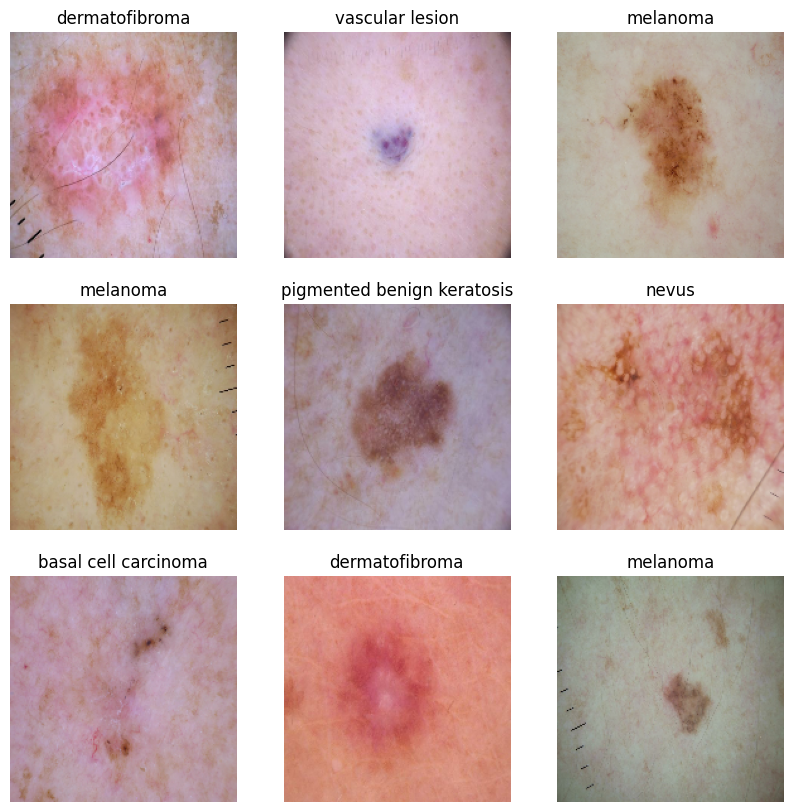

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# **Model Creation**

**Model 1**

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.2004 - loss: 2.2545 - val_accuracy: 0.2058 - val_loss: 2.1050
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 68s 306ms/step - accuracy: 0.2422 - loss: 1.9613 - val_accuracy: 0.3087 - val_loss: 1.9584
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 292ms/step - accuracy: 0.3127 - loss: 1.8091 - val_accuracy: 0.3736 - val_loss: 1.8034
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - accuracy: 0.3743 - loss: 1.6470 - val_accuracy: 0.4497 - val_loss: 1.6755
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.4145 - loss: 1.6714 - val_accuracy: 0.4362 - val_loss: 1.6636
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - accuracy: 0.4535 - loss: 1.5115 - val_accuracy: 0.4564 - val_loss: 1.6398
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 334ms/step - accuracy: 0.4266 - loss: 1.5286 - val_accuracy: 0.4720 - val_loss: 1.5850
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.4905 - loss: 1.4229 - val_accura

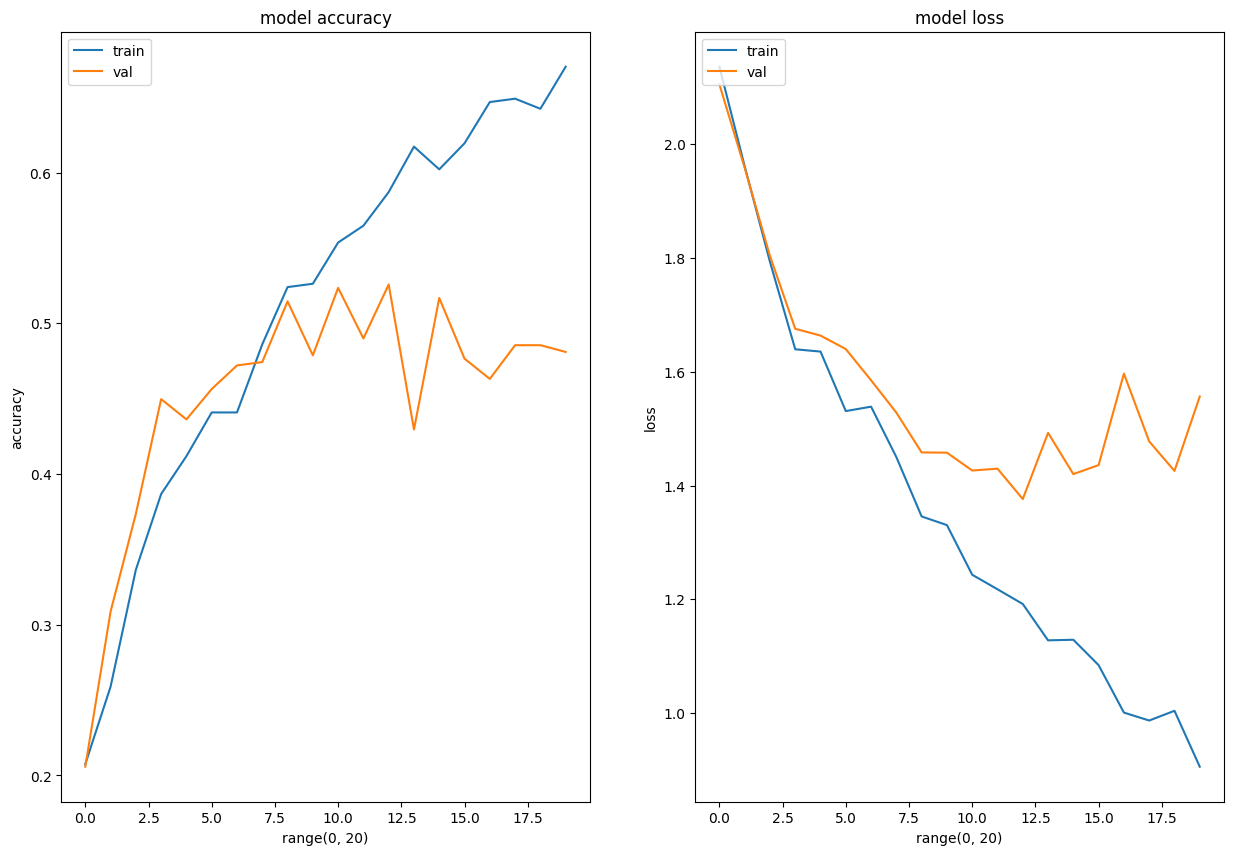

In [12]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model 2**

In [11]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 509s 9s/step - accuracy: 0.2028 - loss: 2.0582 - val_accuracy: 0.2170 - val_loss: 2.0713
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 73s 330ms/step - accuracy: 0.2895 - loss: 1.9216 - val_accuracy: 0.3736 - val_loss: 1.7103
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 332ms/step - accuracy: 0.3698 - loss: 1.6858 - val_accuracy: 0.4049 - val_loss: 1.6611
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 333ms/step - accuracy: 0.3893 - loss: 1.6395 - val_accuracy: 0.4318 - val_loss: 1.5843
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 330ms/step - accuracy: 0.4766 - loss: 1.5285 - val_accuracy: 0.4787 - val_loss: 1.4752
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 290ms/step - accuracy: 0.4911 - loss: 1.4715 - val_accuracy: 0.4586 - val_loss: 1.5437
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 310ms/step - accuracy: 0.4610 - loss: 1.5339 - val_accuracy: 0.5213 - val_loss: 1.4676
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 333ms/step - accuracy: 0.5214 - loss: 1.4070 - val_accura

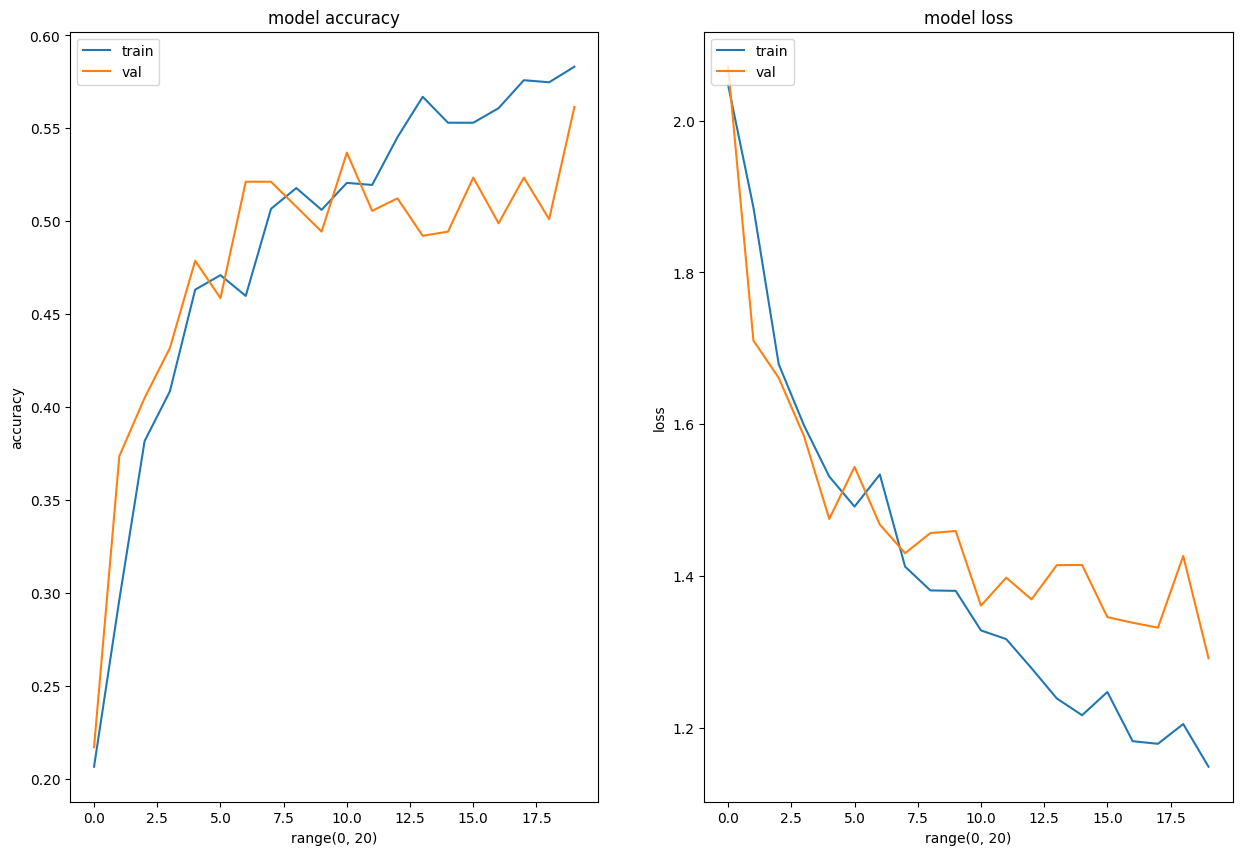

In [15]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model 3**

In [19]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 412ms/step - accuracy: 0.1655 - loss: 2.5224 - val_accuracy: 0.2237 - val_loss: 1.9947
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 335ms/step - accuracy: 0.2847 - loss: 1.8865 - val_accuracy: 0.3803 - val_loss: 1.6881
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 297ms/step - accuracy: 0.4611 - loss: 1.5654 - val_accuracy: 0.4430 - val_loss: 1.6388
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 334ms/step - accuracy: 0.4937 - loss: 1.4753 - val_accuracy: 0.4720 - val_loss: 1.5369
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.4929 - loss: 1.4224 - val_accuracy: 0.5414 - val_loss: 1.3972
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 298ms/step - accuracy: 0.5582 - loss: 1.2561 - val_accuracy: 0.5056 - val_loss: 1.4329
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 332ms/step - accuracy: 0.5634 - loss: 1.2136 - val_accuracy: 0.5235 - val_loss: 1.4249
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 17s 298ms/step - accuracy: 0.5962 - loss: 1.1332 - val_accu

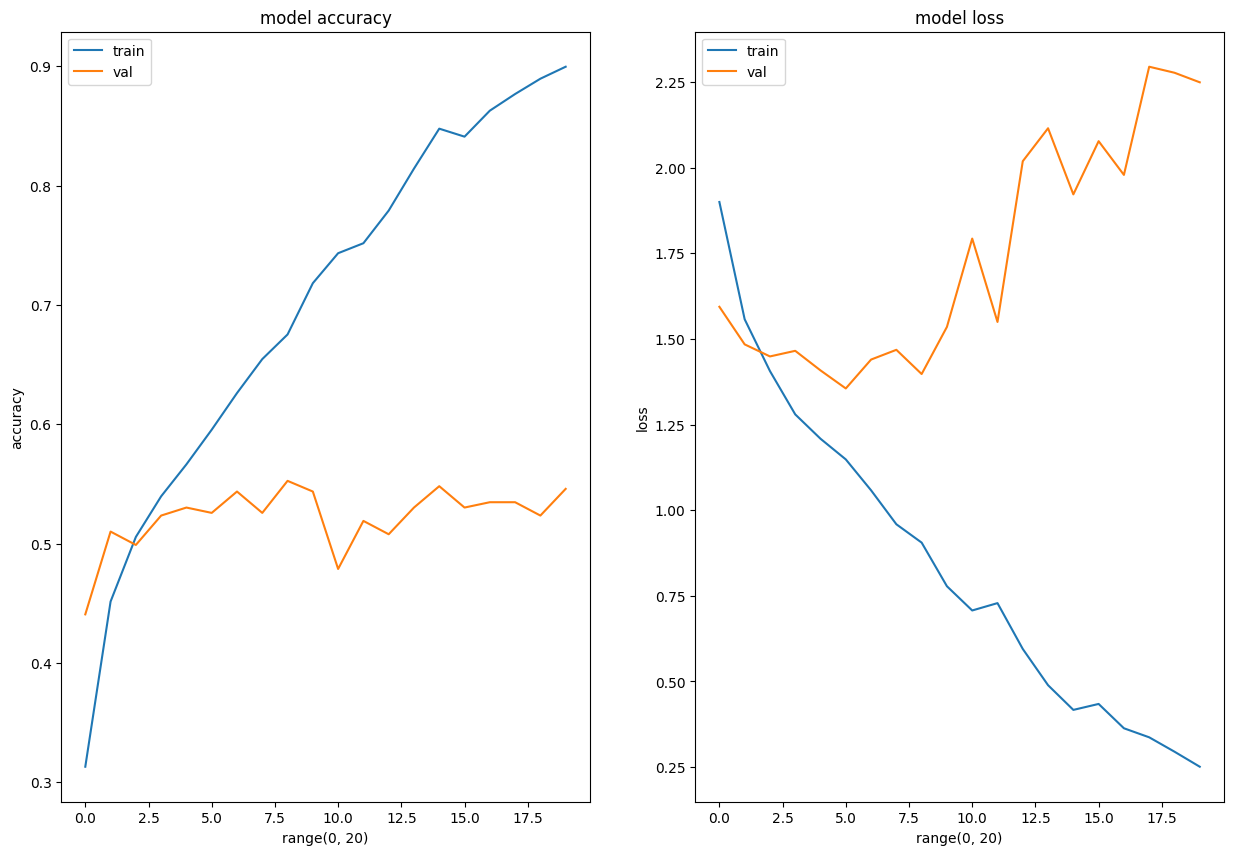

In [12]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### **Visualize distribution of classes**

In [10]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,squamous cell carcinoma,181
2,seborrheic keratosis,77
3,vascular lesion,139
4,dermatofibroma,95
5,melanoma,438
6,nevus,357
7,basal cell carcinoma,376
8,pigmented benign keratosis,462


<Axes: xlabel='No. of Image', ylabel='Class'>

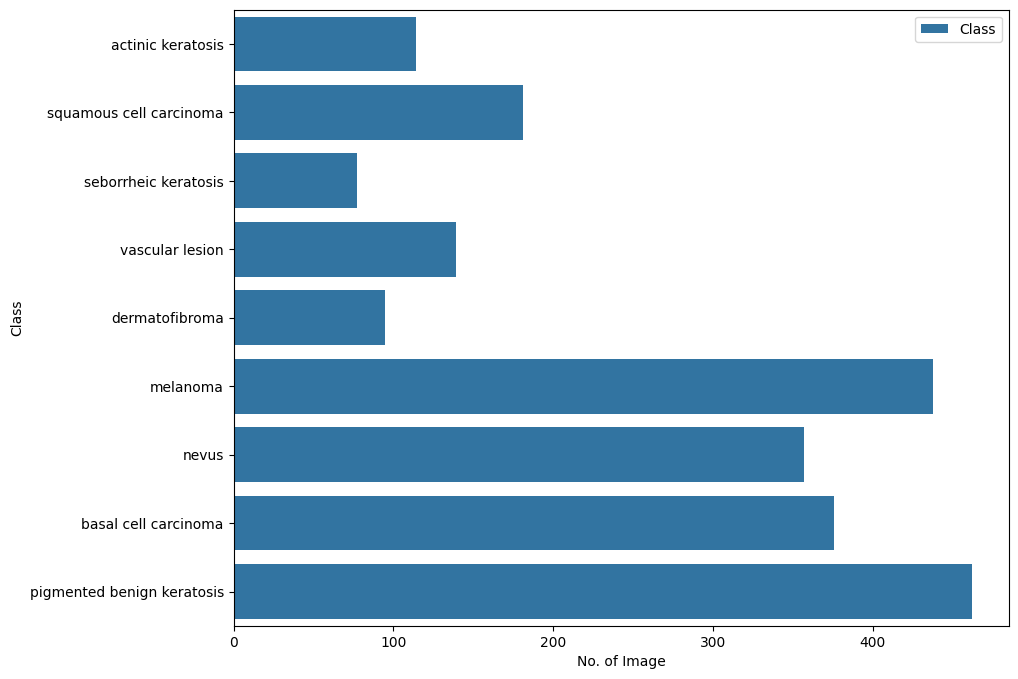

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

## **Data Agumentation**

In [16]:
pip install Augmentor

In [17]:
path_to_training_dataset="/content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #Adding 500 samples per class to make sure that none of the classes are sparse

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C1A9942BC10>: 100%|██████████| 500/500 [00:18<00:00, 27.10 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C19D409F790>: 100%|██████████| 500/500 [00:16<00:00, 30.10 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C19D066D210>: 100%|██████████| 500/500 [00:17<00:00, 29.02 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C19D068F990>: 100%|██████████| 500/500 [01:24<00:00,  5.90 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7C19D06D6450>: 100%|██████████| 500/500 [01:14<00:00,  6.68 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C19D403BB90>: 100%|██████████| 500/500 [00:16<00:00, 29.55 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7C19D04A2DD0>: 100%|██████████| 500/500 [00:37<00:00, 13.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C19D06D6450>: 100%|██████████| 500/500 [00:16<00:00, 29.89 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/ML_AI/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C19D0695410>: 100%|██████████| 500/500 [00:16<00:00, 29.86 Samples/s]


In [18]:
image_count_train1 = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train1)

4500


In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


# **Model Building with Agumentaed Data**

**Model 1**

In [12]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.2000 - loss: 2.0971 - val_accuracy: 0.3920 - val_loss: 1.5726
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.4093 - loss: 1.5796 - val_accuracy: 0.5264 - val_loss: 1.3434
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 240s 1s/step - accuracy: 0.5198 - loss: 1.2868 - val_accuracy: 0.5679 - val_loss: 1.1703
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.5971 - loss: 1.0717 - val_accuracy: 0.6340 - val_loss: 1.0218
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.6819 - loss: 0.8661 - val_accuracy: 0.6897 - val_loss: 0.9378
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.7345 - loss: 0.7312 - val_accuracy: 0.7075 - val_loss: 0.9093
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.7955 - loss: 0.5826 - val_accuracy: 0.7016 - val_loss: 0.9757
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.8351 - loss: 0.4638 - val_accu

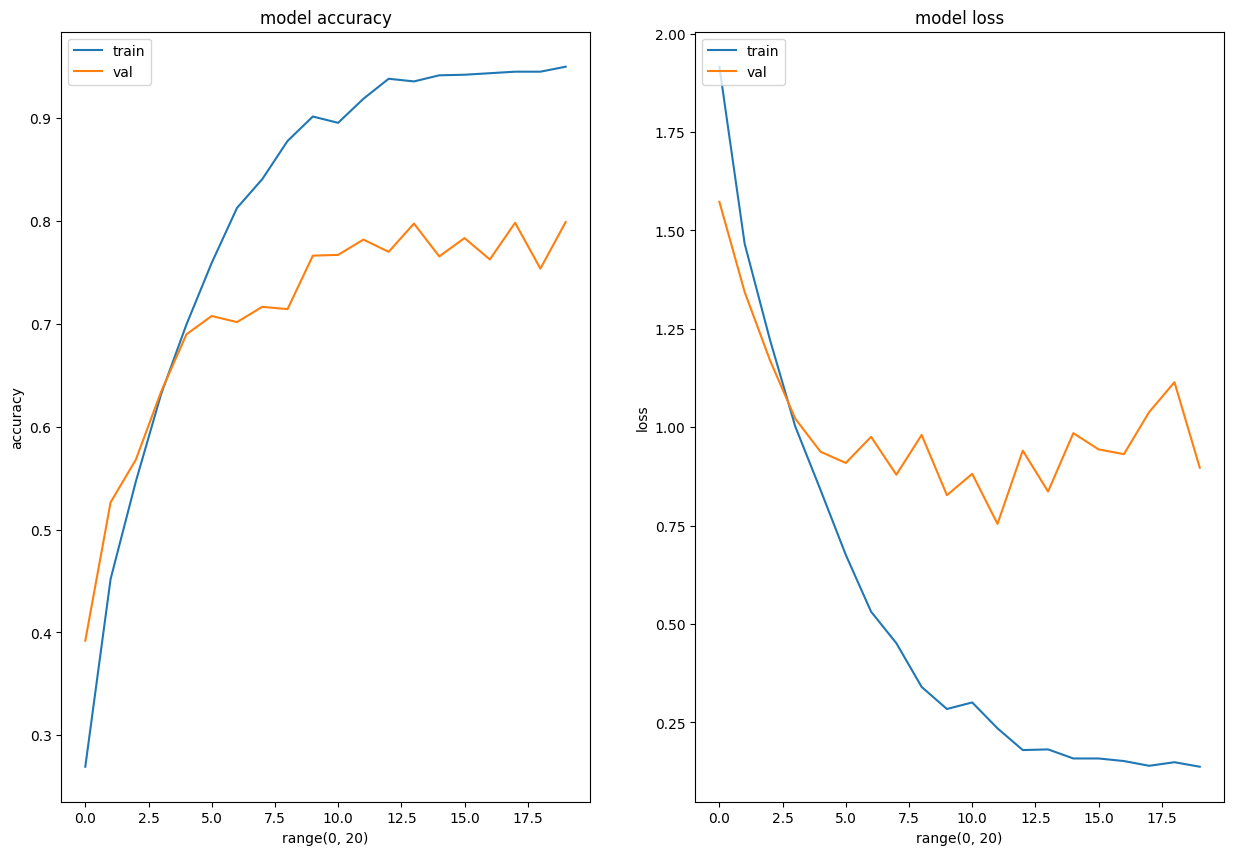

In [13]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model 2**

In [13]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1468s 9s/step - accuracy: 0.1665 - loss: 2.2944 - val_accuracy: 0.2791 - val_loss: 1.8832
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 95s 235ms/step - accuracy: 0.3269 - loss: 1.7375 - val_accuracy: 0.4024 - val_loss: 1.6805
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - accuracy: 0.4147 - loss: 1.5316 - val_accuracy: 0.4781 - val_loss: 1.4871
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 242ms/step - accuracy: 0.4800 - loss: 1.3805 - val_accuracy: 0.5048 - val_loss: 1.3889
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.5265 - loss: 1.2567 - val_accuracy: 0.5160 - val_loss: 1.3018
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 237ms/step - accuracy: 0.5436 - loss: 1.2087 - val_accuracy: 0.5961 - val_loss: 1.2610
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 233ms/step - accuracy: 0.5716 - loss: 1.1322 - val_accuracy: 0.5464 - val_loss: 1.2416
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 233ms/step - accuracy: 0.5968 - loss: 1.

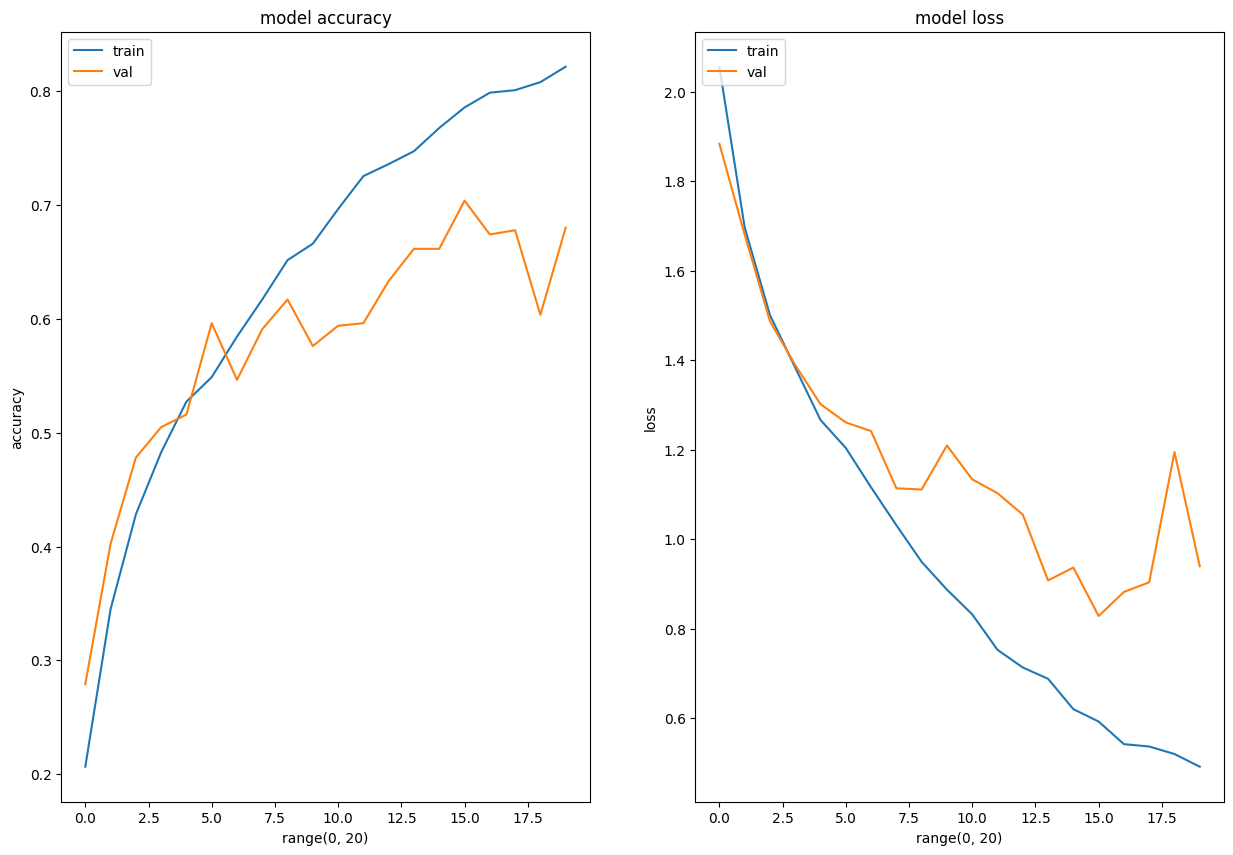

In [14]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model 3**

In [15]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 256ms/step - accuracy: 0.1405 - loss: 2.1788 - val_accuracy: 0.1485 - val_loss: 2.1793
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 233ms/step - accuracy: 0.2378 - loss: 1.9562 - val_accuracy: 0.3630 - val_loss: 1.6320
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 232ms/step - accuracy: 0.3913 - loss: 1.5971 - val_accuracy: 0.3883 - val_loss: 1.5610
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.4255 - loss: 1.4993 - val_accuracy: 0.3898 - val_loss: 1.5199
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 221ms/step - accuracy: 0.4391 - loss: 1.4327 - val_accuracy: 0.4796 - val_loss: 1.3829
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 220ms/step - accuracy: 0.4694 - loss: 1.3534 - val_accuracy: 0.4944 - val_loss: 1.3140
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 40s 235ms/step - accuracy: 0.4943 - loss: 1.2804 - val_accuracy: 0.5264 - val_loss: 1.2722
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.5015 - loss: 1

**Training set accuracy - 73.17%**

**Validation set accuracy - 70.08%**

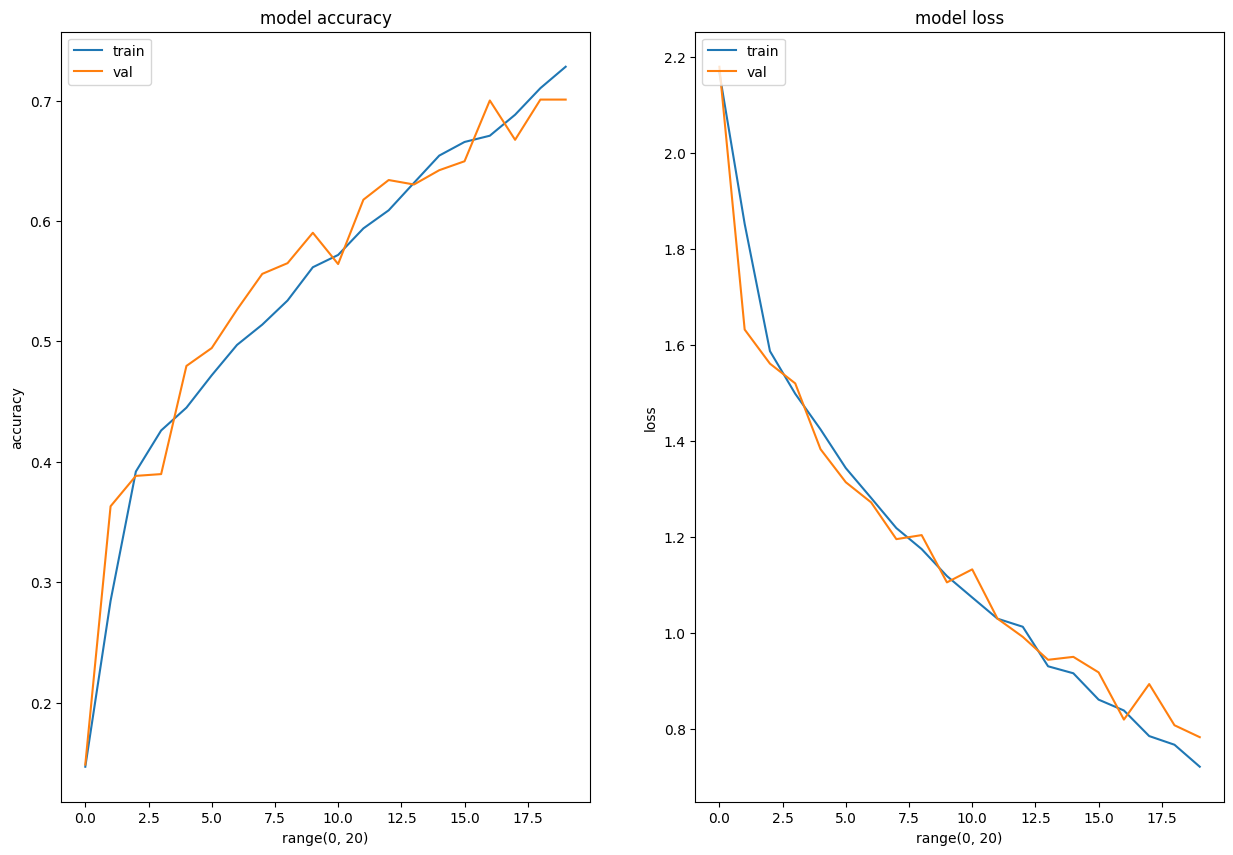

In [16]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

**Model 4**

In [17]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(9,activation='softmax')
])

model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 246ms/step - accuracy: 0.2276 - loss: 2.0896 - val_accuracy: 0.3868 - val_loss: 1.7337
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 76s 235ms/step - accuracy: 0.3955 - loss: 1.5897 - val_accuracy: 0.4699 - val_loss: 1.4041
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - accuracy: 0.4833 - loss: 1.3778 - val_accuracy: 0.5360 - val_loss: 1.2742
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 236ms/step - accuracy: 0.5290 - loss: 1.2606 - val_accuracy: 0.5664 - val_loss: 1.1807
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - accuracy: 0.5624 - loss: 1.1555 - val_accuracy: 0.6021 - val_loss: 1.1093
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 38s 218ms/step - accuracy: 0.6089 - loss: 1.0565 - val_accuracy: 0.6310 - val_loss: 1.0528
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 44s 237ms/step - accuracy: 0.6505 - loss: 0.9617 - val_accuracy: 0.6682 - val_loss: 0.9361
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 226ms/step - accuracy: 0.6690 - loss: 0

**The trained model achieved an accuracy of 83.49% on the training set and 80.62% on the validation set.**

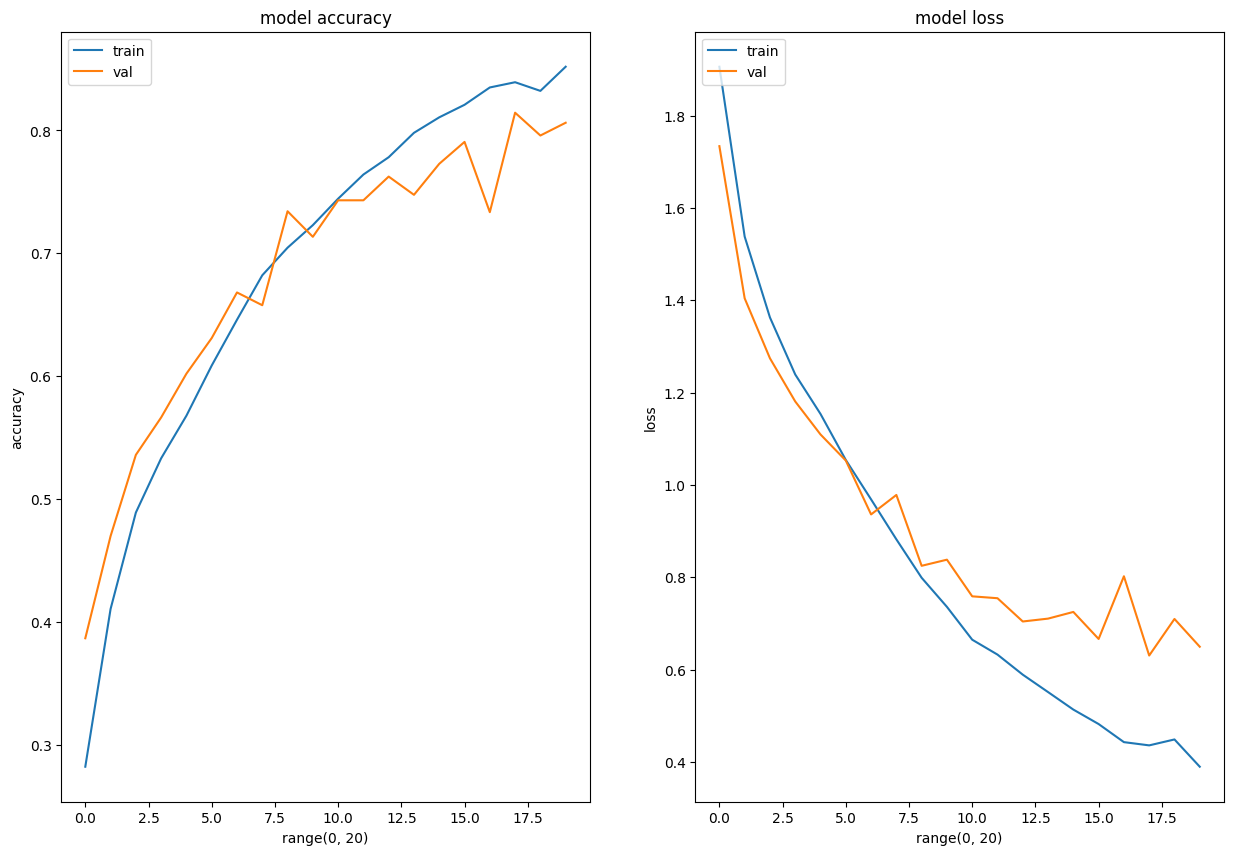

In [18]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Observations

This model showcases well-balanced performance, displaying no signs of underfitting or overfitting.

Data Agumentation has notably enhanced the model's performance across both training and validation datasets.